In [ ]:
prompt:pip install gTTS
*구글에서 제공하는 음성과 관련한 라이브러리

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

In [ ]:
*c:도 e d f g a b:시
*4:4분음표 8:8분음표

In [ ]:
from gtts import gTTS

In [8]:
texte="Hi, everybody. Playing with TF is fun"

In [6]:
tts = gTTS(text = text, lang='en')
tts.save("hi.mp3")

In [9]:
textk = "안녕하세요 여러분"
#tts2 = gTTS(text = text1, lang='ko')
#tts2.save("hiko.mp3")

In [10]:

ttsEn=gTTS(text = texte,lang='en')
ttsKr=gTTS(text = textk,lang='ko')

In [11]:
f=open('enkr.mp3','wb')
ttsEn.write_to_fp(f)
ttsEn.write_to_fp(f)
ttsKr.write_to_fp(f)
f.close()

In [4]:
def seq2dataset(seq,windowSize):
    dataset=[]
    for i in range(len(seq)-windowSize):
        subset = seq[i:(i+windowSize+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)

In [5]:
dataset = seq2dataset(seq,windowSize=4)
dataset.shape

(50, 5)

In [6]:
xTrain = dataset[:,0:4] # 나바야나, ...
yTrain = dataset[:,4] # 비, ...
maxIdxValue=13

In [7]:
#입력값 정규화
xTrain = xTrain / maxIdxValue

In [8]:
from keras.utils import np_utils
yTrain = np_utils.to_categorical(yTrain)
yTrain.shape

Using TensorFlow backend.


(50, 12)

In [9]:
oneHotVecSize = yTrain.shape[1] # 12가지 종류의 음계

In [10]:
#모델 생성
from keras.models import Sequential
from keras.layers import Dense
import keras

In [30]:
model = Sequential()
model.add(Dense(128, input_dim = 4, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(oneHotVecSize, activation='softmax'))

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               640       
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_7 (Dense)              (None, 12)                1548      
Total params: 18,700
Trainable params: 18,700
Non-trainable params: 0
_________________________________________________________________


In [32]:
#모델 학습과정
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [15]:
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses=[]
        print('호출확인용 print문')
    def onEpochEnd(self,batch,logs={}): #<-전치사on으로 시작되는 함수는 대부분 어떤 상황에서 쓰임
        self.losses.append(logs.get('loss'))#<-loss라는 key의 value를 불러주는 함수

In [16]:
history = LossHistory()
history.init()

호출확인용 print문


In [19]:
model.fit(xTrain,
          yTrain,
          epochs = 2000,
          batch_size = 10,
         callbacks=[history])

RuntimeError: You must compile a model before training/testing. Use `model.compile(optimizer, loss)`.

In [3]:
import matplotlib.pyplot as plt

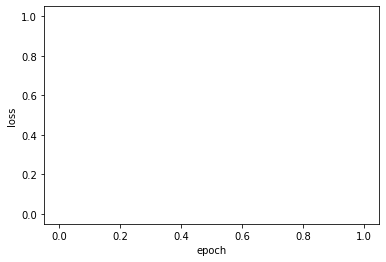

In [31]:
plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [36]:
scores=model.evaluate(xTrain,yTrain)
print("%s:%.2f%%" % (model.metrics_names[1],scores[1]*100)) 


50/50 [==============================] - 0s 614us/step
accuracy:10.00%


In [37]:
seqOut=['g8','e8','e4','f8']

In [40]:
predOut = model.predict(xTrain)
predOut
print(predOut.shape)

(50, 12)


In [41]:
predCount = 50
for i in range(predCount):
    idx = np.argmax(predOut[i]) #<-예측한 index 
    seqOut.append(idx2code[idx])
print(seqOut)
    

['g8', 'e8', 'e4', 'f8', 'e8', 'a4', 'a4', 'e8', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'e8', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'e8', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'e8', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'e8', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'e8', 'a4', 'a4', 'e8', 'a4', 'a4', 'e8', 'a4', 'a4', 'a4', 'a4', 'a4']


In [4]:
from pygame import mixer

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [ ]:
mixer.init()
mixer.music.load("sound1.mp3")
mixer.music.play()

In [46]:
#곡 전체 예측
seqIn =['g8','e8','e4','f8']
seqOut = seqIn
seqIn=[code2idx[it]/float(maxIdxValue) for it in seqIn] #<-정규화까지 한번에 해서 넣기

In [47]:
for i in range(predCount):
    seqIn2 = np.array(seqIn) #<-ex: [0.41, ... ]인 상태
    seqIn2 = np.reshape(seqIn2,(1,4)) #1:batch size,4:feature갯수
    predOut = model.predict(seqIn2) #그 다음 음표 shape= 12class로
    idx = np.argmax(predOut) # 그중 최대값의 index
    seqOut.append(idx2code[idx]) # index인 idx2code
    seqIn.append(idx/float(maxIdxValue)) 
    seqIn.pop(0)
print(seqOut)

['g8', 'e8', 'e4', 'f8', 'e8', 'a4', 'a4', 'e8', 'e8', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4', 'a4']


In [51]:
from keras.layers import LSTM
model=Sequential()
model.add(LSTM(128,input_shape=(4,1)))
model.add(Dense(oneHotVecSize,activation='softmax'))
"""
타임스텝(window size): 샘플 1개에 포함 된 시퀀스 개수(input_shape)
속성: 입력되는 음표 1개당 index 1개 입력
"""

In [52]:
np.shape(xTrain) #샘플수, 타임스탭, 속성수
xTrain=np.reshape(xTrain,(50,4,1))

In [53]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [55]:
model.fit(xTrain,
          yTrain,
          epochs = 2000,
          batch_size = 10,
         callbacks=[history])

Epoch 1/2000
50/50 [==============================] - 0s 4ms/step - loss: 2.4777 - accuracy: 0.1600
Epoch 2/2000
50/50 [==============================] - 0s 379us/step - loss: 2.4249 - accuracy: 0.3400
Epoch 3/2000
50/50 [==============================] - 0s 279us/step - loss: 2.3725 - accuracy: 0.3400
Epoch 4/2000
50/50 [==============================] - 0s 299us/step - loss: 2.3136 - accuracy: 0.3400
Epoch 5/2000
50/50 [==============================] - 0s 299us/step - loss: 2.2356 - accuracy: 0.3400
Epoch 6/2000
50/50 [==============================] - 0s 279us/step - loss: 2.1490 - accuracy: 0.3400
Epoch 7/2000
50/50 [==============================] - 0s 299us/step - loss: 2.0466 - accuracy: 0.3400
Epoch 8/2000
50/50 [==============================] - 0s 299us/step - loss: 1.9921 - accuracy: 0.3400
Epoch 9/2000
50/50 [==============================] - 0s 359us/step - loss: 1.9783 - accuracy: 0.3400
Epoch 10/2000
50/50 [==============================] - 0s 339us/step - loss: 1.9677 

In [56]:
scores=model.evaluate(xTrain,yTrain)
print("%s:%.2f%%" % (model.metrics_names[1],scores[1]*100)) 

50/50 [==============================] - 0s 918us/step
accuracy:88.00%


In [ ]:
"""
LSTM(메모리셀개수, input_dim=입력속성수, input_ )
return_sequence:시퀀스 출력여부
False=마지막 시퀀스에서 한번만 출력(many to one)
True=각 시퀀스에서 출력(many to many)

-stateful: 상태유지모드
학습 샘플의 가장 마지막 상태가 다음 샘플
학습할 때 입력으로 전달할 것인지 여부
"""

"""
상태유지모드(stateful)에서 현재 샘플의 학습
상태가 다음 샘플의 초기 상태로 전달여부(서로 다른 샘플간의 연속성이 있냐)

LSTM 셀 내부적으로 기억할 것은 기억하고,
버릴 것은 버리도록 하기 위한 옵션=stateful

상태유지모드에서는 입력형태를 (batch_input_shape)
(배치사이즈,타임스텝,속성)으로 설정
"""

In [19]:
from keras.layers import LSTM
model=Sequential()
model.add(LSTM(128,batch_input_shape=(1,4,1),stateful=True))
model.add(Dense(oneHotVecSize,activation='softmax'))

In [ ]:
"""
-한 에폭 안에서 여러개의 시퀀스 데이터가 있을 때,
새로운 시퀀스 데이터를 학습하기 전에 상태정보를 초기화 할 필요 있음
-마지막 샘플 학습을 마치고나서, 새로운 에폭이 실행 될 때
새로운 샘플 학습을 해야하므로 상태 초기화 필요
"""

In [20]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [21]:
numEpoch=2000
for i in range(numEpoch):
    print("epoch:"+str(i))
    model.fit(xTrain, yTrain,
              epochs = 1,
              batch_size = 1,
              callbacks=[history],
              shuffle=False)
    model.reset_states()
    #매 epoch마다 states를 초기화

epoch:0


ValueError: Error when checking input: expected lstm_2_input to have 3 dimensions, but got array with shape (50, 4)

In [31]:
scores = model.evaluate(xTrain,yTrain,batch_size=1)
print("%s",".2f%%" % (model.metrics_names[1]))

SyntaxError: EOL while scanning string literal (<ipython-input-31-4f0361a17acd>, line 2)